In [1]:
import pandas as pd

In [2]:
arxiv_df = pd.read_csv("arxiv_publications.csv")

In [3]:
arxiv_df = arxiv_df[arxiv_df.published.gt("2017")].sort_values(by="published")[["published","url"]]

In [4]:
arxiv_df["published"] = pd.to_datetime(arxiv_df["published"])

In [5]:
arxiv_df = arxiv_df.set_index("published")

In [6]:
arxiv_df

,url
published,
2017-01-01 00:00:00+00:00,5
2017-02-01 00:00:00+00:00,3
2017-03-01 00:00:00+00:00,7
2017-04-01 00:00:00+00:00,3
2017-05-01 00:00:00+00:00,6
...,...
2022-05-01 00:00:00+00:00,30
2022-06-01 00:00:00+00:00,35
2022-07-01 00:00:00+00:00,49


In [7]:
github_df = pd.read_csv("github_sum_commits.csv")

In [8]:
github_df = github_df[github_df.commit_date.gt("2017")].sort_values(by="commit_date")

In [9]:
github_df["commit_date"] = pd.to_datetime(github_df["commit_date"])

In [10]:
github_df = github_df.set_index("commit_date")

In [11]:
github_df

,commits
commit_date,
2017-01-01 00:00:00+00:00,31
2017-02-01 00:00:00+00:00,5
2017-03-01 00:00:00+00:00,17
2017-04-01 00:00:00+00:00,14
2017-05-01 00:00:00+00:00,3
...,...
2022-05-01 00:00:00+00:00,733
2022-06-01 00:00:00+00:00,505
2022-07-01 00:00:00+00:00,466


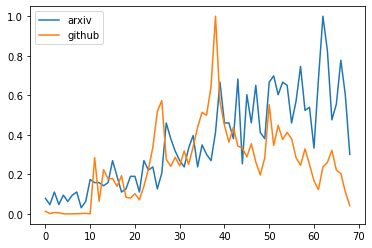

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")
ax.plot(github_df.commits.values/github_df.commits.values.max(), label="github")
ax.legend()
plt.show()

In [13]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(np.array([arxiv_df.url.values ,github_df.commits.values]).T, maxlag=[7])


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.8170  , p=0.0155  , df_denom=47, df_num=7
ssr based chi2 test:   chi2=26.0127 , p=0.0005  , df=7
likelihood ratio test: chi2=21.7215 , p=0.0028  , df=7
parameter F test:         F=2.8170  , p=0.0155  , df_denom=47, df_num=7


{7: ({'ssr_ftest': (2.8170461750655615, 0.015541330460078441, 47.0, 7),
   'ssr_chi2test': (26.01272425486072, 0.0005010386707734917, 7),
   'lrtest': (21.72151479271173, 0.0028368849160228735, 7),
   'params_ftest': (2.8170461750654643, 0.01554133046008137, 47.0, 7.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [14]:
#Counter test for reverse granger, luckily it fails
grangercausalitytests(np.array([github_df.commits.values, arxiv_df.url.values ]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0748  , p=0.7854  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.0782  , p=0.7797  , df=1
likelihood ratio test: chi2=0.0782  , p=0.7798  , df=1
parameter F test:         F=0.0748  , p=0.7854  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0057  , p=0.9944  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=0.0122  , p=0.9939  , df=2
likelihood ratio test: chi2=0.0122  , p=0.9939  , df=2
parameter F test:         F=0.0057  , p=0.9944  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0365  , p=0.9906  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=0.1226  , p=0.9890  , df=3
likelihood ratio test: chi2=0.1225  , p=0.9890  , df=3
parameter F test:         F=0.0365  , p=0.9906  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2591  , p=0.9029  , df_d

{1: ({'ssr_ftest': (0.07478016712230048, 0.7853669684275922, 65.0, 1),
   'ssr_chi2test': (0.07823155945102205, 0.7797084060334569, 1),
   'lrtest': (0.07818659263557493, 0.7797700926201068, 1),
   'params_ftest': (0.07478016712230512, 0.7853669684275922, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.005652489167976021, 0.9943639684572634, 62.0, 2),
   'ssr_chi2test': (0.012216670137238497, 0.9939102828825196, 2),
   'lrtest': (0.01221555648874073, 0.9939108363160204, 2),
   'params_ftest': (0.005652489167977999, 0.99436396845726, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.036543912097105294, 0.99055435428453, 59.0, 3),
   'ssr_chi2test': (0.12263889144452284, 0.9889886947688673, 3),
   'lrtest': (0.1225250907471036, 0.9890036450713326, 3),
   'params_ftest': (0.03654391209710591, 0.9905543542845292, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [15]:
#normalized granger
grangercausalitytests(np.array([arxiv_df.url.values/arxiv_df.url.values.max(),github_df.commits.values/github_df.commits.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.8606  , p=0.0067  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=8.2234  , p=0.0041  , df=1
likelihood ratio test: chi2=7.7630  , p=0.0053  , df=1
parameter F test:         F=7.8606  , p=0.0067  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5139  , p=0.0358  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=7.5946  , p=0.0224  , df=2
likelihood ratio test: chi2=7.1941  , p=0.0274  , df=2
parameter F test:         F=3.5139  , p=0.0358  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4076  , p=0.0761  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=8.0798  , p=0.0444  , df=3
likelihood ratio test: chi2=7.6222  , p=0.0545  , df=3
parameter F test:         F=2.4076  , p=0.0761  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8206  , p=0.1377  , df_d

{1: ({'ssr_ftest': (7.860648058759275, 0.00665361049710669, 65.0, 1),
   'ssr_chi2test': (8.22344719993278, 0.0041352573420292815, 1),
   'lrtest': (7.762976302998368, 0.0053328011885559095, 1),
   'params_ftest': (7.86064805875925, 0.006653610497106779, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.5138997693763505, 0.035842431906283154, 62.0, 2),
   'ssr_chi2test': (7.594557566071466, 0.02243173048325276, 2),
   'lrtest': (7.194120328693884, 0.02740416789097073, 2),
   'params_ftest': (3.5138997693763603, 0.035842431906282876, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.407612614757458, 0.07613949568179763, 59.0, 3),
   'ssr_chi2test': (8.079784707152148, 0.04439125588032382, 3),
   'lrtest': (7.622204177697597, 0.05450026018061172, 3),
   'params_ftest': (2.407612614757452, 0.07613949568179823, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.,

In [16]:
#reverse normalized granger
grangercausalitytests(np.array([github_df.commits.values/github_df.commits.values.max(),arxiv_df.url.values/arxiv_df.url.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0748  , p=0.7854  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.0782  , p=0.7797  , df=1
likelihood ratio test: chi2=0.0782  , p=0.7798  , df=1
parameter F test:         F=0.0748  , p=0.7854  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0057  , p=0.9944  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=0.0122  , p=0.9939  , df=2
likelihood ratio test: chi2=0.0122  , p=0.9939  , df=2
parameter F test:         F=0.0057  , p=0.9944  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0365  , p=0.9906  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=0.1226  , p=0.9890  , df=3
likelihood ratio test: chi2=0.1225  , p=0.9890  , df=3
parameter F test:         F=0.0365  , p=0.9906  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2591  , p=0.9029  , df_d

{1: ({'ssr_ftest': (0.07478016712230962, 0.7853669684275719, 65.0, 1),
   'ssr_chi2test': (0.0782315594510316, 0.7797084060334438, 1),
   'lrtest': (0.07818659263557493, 0.7797700926201068, 1),
   'params_ftest': (0.07478016712230617, 0.7853669684275719, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.005652489167983865, 0.9943639684572566, 62.0, 2),
   'ssr_chi2test': (0.012216670137255449, 0.9939102828825112, 2),
   'lrtest': (0.012215556488797574, 0.9939108363159921, 2),
   'params_ftest': (0.005652489167981873, 0.9943639684572566, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.03654391209710349, 0.99055435428453, 59.0, 3),
   'ssr_chi2test': (0.12263889144451678, 0.9889886947688681, 3),
   'lrtest': (0.12252509074721729, 0.9890036450713178, 3),
   'params_ftest': (0.036543912097104427, 0.99055435428453, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

Conclusions:
- Reverse granger luckily fails
- Unnormalized granger good at 7
- Normalized granger extremely good at 1
- Interestingly normalized granger recovers exact unnormalized at 7
- Normalized reverse granger luckily fails

In [17]:
google_trends_df = pd.read_csv("google_trends.csv")#, header=1)

google_trends_df = google_trends_df[google_trends_df.month.gt("2017")].sort_values(by="month")
google_trends_df["month"] = pd.to_datetime(google_trends_df["month"])
google_trends_df = google_trends_df.set_index("month")
google_trends_df

,search_freq
month,
2017-01-01,0
2017-02-01,0
2017-03-01,0
2017-04-01,0
2017-05-01,0
...,...
2022-05-01,82
2022-06-01,78
2022-07-01,77


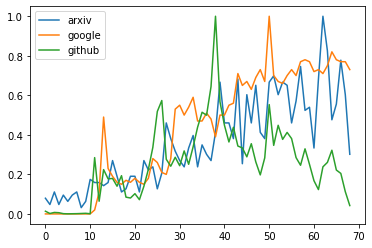

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")
ax.plot(google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), label="google")
ax.plot(github_df.commits.values/github_df.commits.values.max(), label="github")

ax.legend()
plt.show()

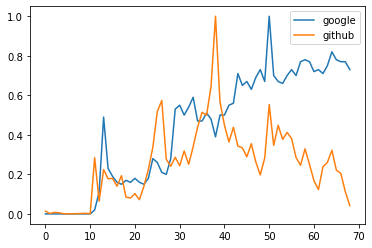

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#ax.plot(arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")
ax.plot(google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), label="google")
ax.plot(github_df.commits.values/github_df.commits.values.max(), label="github")

ax.legend()
plt.show()

In [20]:
#is it off by 1 bug or reality, that github is earlier???
#what is the downtrend in github at the end?

In [21]:
#normalized github vs gooogle granger
grangercausalitytests(np.array([github_df.commits.values/github_df.commits.values.max(),google_trends_df.search_freq.values/google_trends_df.search_freq.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5271  , p=0.4704  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.5514  , p=0.4577  , df=1
likelihood ratio test: chi2=0.5492  , p=0.4587  , df=1
parameter F test:         F=0.5271  , p=0.4704  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2717  , p=0.7630  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=0.5873  , p=0.7455  , df=2
likelihood ratio test: chi2=0.5847  , p=0.7465  , df=2
parameter F test:         F=0.2717  , p=0.7630  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5263  , p=0.6659  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=1.7664  , p=0.6223  , df=3
likelihood ratio test: chi2=1.7432  , p=0.6274  , df=3
parameter F test:         F=0.5263  , p=0.6659  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4217  , p=0.7923  , df_d

{1: ({'ssr_ftest': (0.5270772574489971, 0.4704443822500387, 65.0, 1),
   'ssr_chi2test': (0.5514039001004893, 0.4577446280780525, 1),
   'lrtest': (0.5491802784621882, 0.4586528254459361, 1),
   'params_ftest': (0.5270772574489899, 0.4704443822500387, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.27173412981318273, 0.7629596859213525, 62.0, 2),
   'ssr_chi2test': (0.5872963450801046, 0.7455387463097585, 2),
   'lrtest': (0.5847372812827416, 0.7464932974764653, 2),
   'params_ftest': (0.271734129813175, 0.7629596859213579, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5263466089451236, 0.6659002596107844, 59.0, 3),
   'ssr_chi2test': (1.7663835351039743, 0.6222774319807074, 3),
   'lrtest': (1.7431597850824687, 0.6273813978552418, 3),
   'params_ftest': (0.526346608945126, 0.6659002596107828, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.,

In [22]:
# google vs github reverse normalized granger
grangercausalitytests(np.array([google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(),github_df.commits.values/github_df.commits.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1005  , p=0.7522  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.1051  , p=0.7457  , df=1
likelihood ratio test: chi2=0.1051  , p=0.7458  , df=1
parameter F test:         F=0.1005  , p=0.7522  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0571  , p=0.3536  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=2.2848  , p=0.3191  , df=2
likelihood ratio test: chi2=2.2467  , p=0.3252  , df=2
parameter F test:         F=1.0571  , p=0.3536  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8550  , p=0.4696  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=2.8692  , p=0.4122  , df=3
likelihood ratio test: chi2=2.8086  , p=0.4221  , df=3
parameter F test:         F=0.8550  , p=0.4696  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3192  , p=0.2741  , df_d

{1: ({'ssr_ftest': (0.10050977326828017, 0.7522348043635438, 65.0, 1),
   'ssr_chi2test': (0.10514868588066233, 0.7457363697576792, 1),
   'lrtest': (0.10506747366156333, 0.7458311874697348, 1),
   'params_ftest': (0.10050977326827515, 0.752234804363561, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0571483981798235, 0.3536233972687558, 62.0, 2),
   'ssr_chi2test': (2.284804602517683, 0.3190516422850489, 2),
   'lrtest': (2.2467105281065756, 0.32518687430028537, 2),
   'params_ftest': (1.0571483981798242, 0.3536233972687558, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.8549640230574161, 0.46957899367991474, 59.0, 3),
   'ssr_chi2test': (2.8692012977181083, 0.4122344755376276, 3),
   'lrtest': (2.8085857943656265, 0.4220884920013682, 3),
   'params_ftest': (0.8549640230574193, 0.4695789936799124, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

Conclusion:
- Granger and reverse fails for Gihub and Google

In [23]:
import peakdetect

google_peaks = peakdetect.peakdetect(google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), google_trends_df.index, lookahead=4)#, )#, lookahead, delta)

In [24]:
google_peaks

[[[numpy.datetime64('2018-02-01T00:00:00.000000000'), 0.49],
  [numpy.datetime64('2019-10-01T00:00:00.000000000'), 0.59],
  [numpy.datetime64('2020-08-01T00:00:00.000000000'), 0.71],
  [numpy.datetime64('2021-03-01T00:00:00.000000000'), 1.0],
  [numpy.datetime64('2021-11-01T00:00:00.000000000'), 0.78]],
 [[numpy.datetime64('2018-06-01T00:00:00.000000000'), 0.15],
  [numpy.datetime64('2020-03-01T00:00:00.000000000'), 0.39],
  [numpy.datetime64('2020-11-01T00:00:00.000000000'), 0.63],
  [numpy.datetime64('2021-06-01T00:00:00.000000000'), 0.66],
  [numpy.datetime64('2022-03-01T00:00:00.000000000'), 0.71]]]

In [25]:
github_peaks = peakdetect.peakdetect(github_df.commits.values/github_df.commits.values.max(), github_df.index, lookahead=4)#, )#, look, delta)

In [26]:
github_peaks

[[[Timestamp('2017-12-01 00:00:00+0000', tz='UTC'), 0.28483516483516486],
  [Timestamp('2019-03-01 00:00:00+0000', tz='UTC'), 0.5736263736263736],
  [Timestamp('2020-03-01 00:00:00+0000', tz='UTC'), 1.0],
  [Timestamp('2021-03-01 00:00:00+0000', tz='UTC'), 0.552967032967033]],
 [[Timestamp('2017-06-01 00:00:00+0000', tz='UTC'), 0.00043956043956043956],
  [Timestamp('2018-10-01 00:00:00+0000', tz='UTC'), 0.07208791208791208],
  [Timestamp('2019-05-01 00:00:00+0000', tz='UTC'), 0.2413186813186813],
  [Timestamp('2021-01-01 00:00:00+0000', tz='UTC'), 0.19736263736263737],
  [Timestamp('2022-02-01 00:00:00+0000', tz='UTC'), 0.12307692307692308]]]

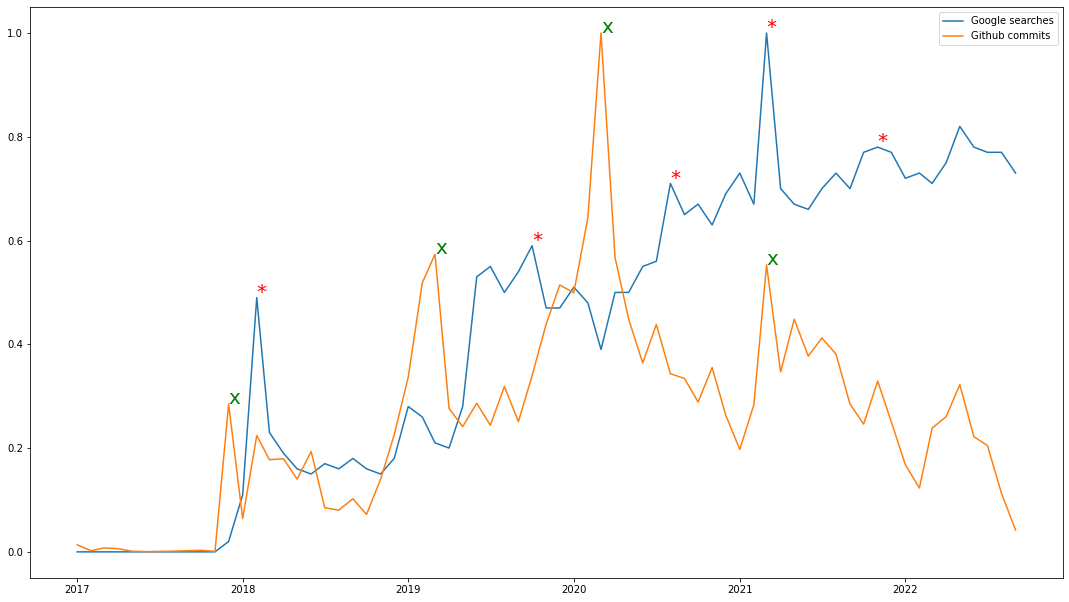

In [29]:
fig, ax = plt.subplots()

#ax = google_trends_df.search_freq.plot()
locs, labels=plt.xticks()

ax.plot(google_trends_df.index,google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), label="Google searches")
ax.plot(github_df.index,github_df.commits.values/github_df.commits.values.max(), label="Github commits")
#ax.plot(arxiv_df.index,arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")


for peak in google_peaks[0]:
    ax.annotate("*",xy=(peak[0],peak[1]), fontsize=20, color="red")

for peak in github_peaks[0]:
    ax.annotate("x",xy=(peak[0],peak[1]), fontsize=20, color="green")

ax.legend()
    
fig.set_size_inches(18.5, 10.5)
plt.show()

2018-02-01 https://variety.com/2018/digital/news/reddit-twitter-deepfake-ban-1202690627/

2019-10-01 https://ai.facebook.com/blog/deepfake-detection-challenge/

2020-08-01 https://www.cnet.com/science/mit-releases-deepfake-video-of-nixon-announcing-nasa-apollo-11-disaster/
           https://www.theverge.com/2020/7/27/21339898/deepfake-audio-voice-clone-scam-attempt-nisos
           
2021-03-01 https://edition.cnn.com/videos/business/2021/03/02/tom-cruise-tiktok-deepfake-orig.cnn-business
           https://www.nytimes.com/2021/03/14/us/raffaela-spone-victory-vipers-deepfake.html

vs (maybe not)

https://en.wikipedia.org/wiki/Deepfake#Politics


Vajon miért csökken a Github aktivitás?

Nos, az emberek száma is csökken, akiket érdekel - lásd chart a github_analyzer notebookban.

Jobb lenne per repo megcsinálni a dolgot, mert az mutatná, hogy mennyire centralizálódik.

Ez egy jó mese elem lenne.